In [5]:
import math

def points_beyond(current, hit, grid_shape):
    """
    Return all grid points (as (x, y) tuples) on the ray that starts at 'current',
    goes through 'hit', and extends further until it goes out of bounds.
    
    Parameters:
      current: Tuple[int, int] - starting point (row, col)
      hit: Tuple[int, int] - point that the line goes through
      grid_shape: Tuple[int, int] - shape of the grid (n_rows, n_cols)
    
    Returns:
      List of (row, col) tuples along the ray from 'hit' onward.
    """
    x1, y1 = current
    x2, y2 = hit
    
    # Compute the direction vector
    dx = x2 - x1
    dy = y2 - y1

    # Guard against the degenerate case where the two points are the same.
    if dx == 0 and dy == 0:
        return []

    # Normalize the direction vector using the greatest common divisor
    g = math.gcd(abs(dx), abs(dy))
    step_x = dx // g
    step_y = dy // g

    # Now, starting at the hit point, extend the line until you exit the grid.
    points = []
    x, y = x1, y1
    n_rows, n_cols = grid_shape
    # while 0 <= x < n_rows and 0 <= y < n_cols:
    #     points.append((x, y))
    #     x += step_x
    #     y += step_y
    while (x, y) != (x2, y2):  # Stop before reaching (xc, yc)
        points.append((x, y))
        x += step_x
        y += step_y

    return points

# Example usage:
current_point = (0, 0)
hit_point = (4, 7)
grid_size = (10, 10)
result = points_beyond(current_point, hit_point, grid_size)
print(result)


[(0, 0)]


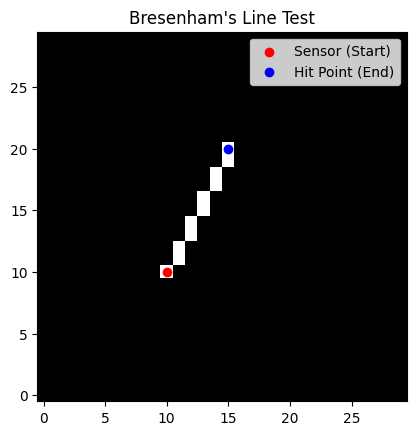

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import line

# Grid size
grid_size = (30, 30)

# Define start and end points
xc, yc = 10, 10   # Sensor position
xh, yh = 20, 15   # Lidar hit point

# Get line cells
rr, cc = line(xc, yc, xh, yh)

# Create an empty grid
grid = np.zeros(grid_size)

# Mark the traced cells
grid[rr, cc] = 1  # Set traced cells to 1

# Plot the grid
plt.imshow(grid, cmap='gray', origin='lower')
plt.scatter(yc, xc, color='red', label="Sensor (Start)")
plt.scatter(yh, xh, color='blue', label="Hit Point (End)")
plt.legend()
plt.title("Bresenham's Line Test")
plt.show()
